# Survival Analysis
---

In [33]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot inline
%matplotlib inline

# Overview
---

Traditionally, survival analysis was developed to measure lifespans of individuals. An actuary or health professional would ask questions like “how long does this population live for?”, and answer it using survival analysis. For example, the population may be a nation’s population (for actuaries), or a population stricken by a disease (in the medical professional’s case). Traditionally, sort of a morbid subject.

But survival analysis can be applied to not only births and deaths, but any duration. Medical professionals might be interested in the time between childbirths, where a birth in this case is the event of having a child, and a death is becoming pregnant again! (obviously, we are loose with our definitions of birth and death) Another example is users subscribing to a service: a birth is a user who joins the service, and a death is when the user leaves the service.

# Use Cases
---

- Time until product failure
- Time until a warranty claim
- Time until a process reaches a critical level
- Time from initial sales contact to a sale
- Time from employee hire to either termination or quit
- Time from a salesperson hire to their first sale

# Installation
---

In [34]:
# pip install lifelines

# Survival Chart
---

In [35]:
# time in months for someone to churn
time = [2, 3, 6, 6, 7, 10, 15, 15, 16, 27, 30, 32]
# did they churn after the time duration?
event = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

```
TIME   #RISK  #CHURN  HAZ    1-HAZ   SURVIVAL S(T)
----   -----  ------  ---    -----   ------------
0      12     0       0/12   12/12   12/12         = 1.000
2      12     1       1/12   11/12   1.000 * 11/12 = 0.917
6      10     2       2/10   8/10    0.917 * 8/10  = 0.734
7      8      1       1/8    7/8     0.734 * 7/8   = 0.642
```

# Breakout 1
---

- Finish the table for remaining times (10, 15, 16, 27, 30, 32 months)

# Breakout 2
---

Take the `name` and `event` data above and create a function that creates the `dataframe` below.

In [39]:
def survival(time, event):
    # write code here
    pass

In [37]:
df = survival(time, event); df

,time,died,risk,haz,ihaz,surv
0,2.0,1.0,12.0,0.083333,0.916667,0.916667
2,6.0,2.0,10.0,0.200000,0.800000,0.733333
3,7.0,1.0,8.0,0.125000,0.875000,0.641667
5,15.0,2.0,6.0,0.333333,0.666667,0.427778
6,16.0,1.0,4.0,0.250000,0.750000,0.320833
7,27.0,1.0,3.0,0.333333,0.666667,0.213889
8,30.0,1.0,2.0,0.500000,0.500000,0.106944
9,32.0,1.0,1.0,1.000000,0.000000,0.000000


# Breakout 3
---

Plot the `time` vs `survival`

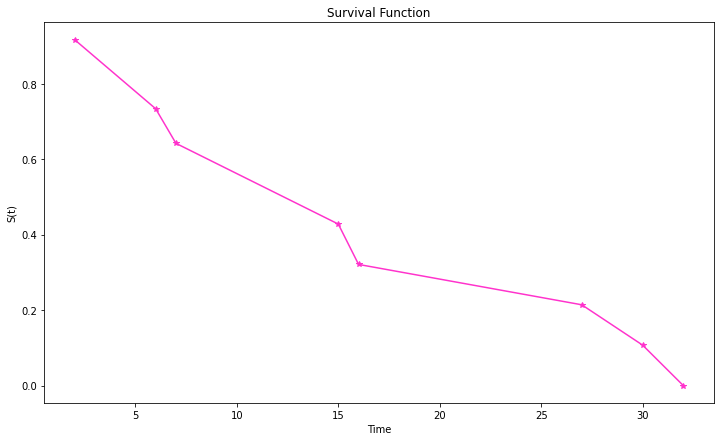

In [38]:
# write code here

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [ ]:
kmf.fit(time, event_observed=event)

In [ ]:
kmf.event_table

In [ ]:
kmf.survival_function_

In [ ]:
# survival function without confidence intervals
kmf.survival_function_.plot(figsize=(12,5))
plt.title('Survival function of Churn');

In [ ]:
# survival function with confidence intervals
kmf.plot(figsize=(12, 5));

In [ ]:
# half of customers churn after 15 months
kmf.median_survival_time_

In [ ]:
# the probability of someone churning at or before 7 months
1 - kmf.predict(7)

# Politics
---

For this example, we will be investigating the lifetimes of political leaders around the world. A political leader, in this case, is defined by a single individual’s time in office who controls the ruling regime. This political leader could be an elected president, unelected dictator, monarch, etc. The birth event is the start of the individual’s tenure, and the death event is the retirement of the individual. Censoring can occur if they are a) still in offices at the time of dataset compilation (2008), or b) die while in power (this includes assassinations).

For example, the Bush regime began in 2000 and officially ended in 2008 upon his retirement, thus the regime’s lifespan was eight years, and there was a “death” event observed. On the other hand, the JFK regime lasted 2 years, from 1961 and 1963, and the regime’s official death event was not observed – JFK died before his official retirement.

In [ ]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

In [ ]:
kmf = KaplanMeierFitter()

In [ ]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

In [ ]:
kmf.survival_function_.plot(figsize=(12,5))
plt.title('Survival function of political regimes');

How do we interpret this? The y-axis represents the probability a leader is still around after 𝑡 years, where 𝑡 years is on the x-axis. We see that very few leaders make it past 20 years in office.

In [ ]:
# survival function with confidence intervals
kmf.plot(figsize=(12, 7));

In [ ]:
# half of all tenures are more than 4 years
kmf.median_survival_time_

In [ ]:
ax = plt.subplot(111)

dem = data["democracy"] == "Democracy"

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.title("Lifespans of different global regimes");

In [ ]:
regime_types = data['regime'].unique()

plt.figure(figsize=(12,5))
for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

# Log-Rank Test
---

The log-rank test is a hypothesis test that is used to compare the survival distribution of two samples.
Goal: Our goal is to see if there is any significant difference between the groups being compared.
Null Hypothesis: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between those groups, then we have to reject our null hypothesis.

In [ ]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem])

results.print_summary()

In [ ]:
# we reject the null hypothesis that there is no difference in tenure
# between democratic and non-democratic admnistrations
results.p_value

# Survival Regression
---

An example dataset we will use is the Rossi recidivism dataset.

The DataFrame rossi contains 432 observations. The week column is the duration, the arrest column denotes if the event (a re-arrest) occurred, and the other columns represent variables we wish to regress against.

```
week
week of first arrest after release or censoring; all censored observations are censored at 52 weeks.

arrest
1 if arrested, 0 if not arrested.

fin
financial aid: no yes.

age
in years at time of release.

race
0 = caucasian, 1 = non-caucasian.

wexp
full-time work experience before incarceration: no or yes.

mar
marital status at time of release: married or not married.

paro
released on parole? no or yes.

prio
number of convictions prior to current incarceration.
```

In [ ]:
from lifelines.datasets import load_rossi

rossi = load_rossi(); rossi.head(3)

Cox’s proportional hazard model

The idea behind Cox’s proportional hazard model is that the log-hazard of an individual is a linear function of their covariates and a population-level baseline hazard that changes over time.

> In other regression models, a column of 1s might be added that represents that intercept or baseline. This is not necessary in the Cox model. In fact, there is no intercept in the Cox model - the baseline hazard represents this. lifelines will throw warnings and may experience convergence errors if a column of 1s is present in your dataset or formula.

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary

> Taking a look at these coefficients for a moment, prio (the number of prior arrests) has a coefficient of about 0.09. Thus, a one unit increase in prio means the the baseline hazard will increase by a factor of exp(0.09)=1.10 - about a 10% increase. Recall, in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. The value exp(0.09) is called the hazard ratio

In [ ]:
plt.figure(figsize=(12, 7))
cph.plot();

In [ ]:
# plot what the survival curves look like as we vary a single covariate while holding everything else equal
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm', figsize=(12, 7));

In [ ]:
# you can specify interation terms
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()

# Breakout 4
---

In this breakout, we are going to perform an analysis of patients with lung cancer.

- Load in the `lung.csv` file
- Delete rows that contain null values
- Create a `dead` column, where `status is 1` is 0 (alive), and `status is 2` is 1 (dead)
- Fit a Kaplan Meier model
- Show the event table
- Plot a survival chart
- Create a Cox regression model
- What factors have a strong relationship with death?